### 1. Import Libraries

In [1]:
import os
import sys
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 2. Import from mlcblab

In [2]:
from mlcvlab.models.nn1 import NN1
from mlcvlab.models.nn2 import NN2
from mlcvlab.nn.losses import l2
from mlcvlab.optim.sgd import SGD
from mlcvlab.optim.adam import Adam

### 3. Set Seed

In [3]:
np.random.seed(42)

### 4.Example code to load data and view image

In [4]:
def display_digit(x, index):
    some_digit = x[0]
    some_digit_image = some_digit.reshape((28, 28))

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')
    plt.show()

In [5]:
x, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

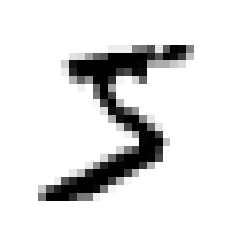

In [6]:
display_digit(x, 0)

### 5. Helper functions

In [7]:
def load_dataset():
    #TODO
    x, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
    return x,y

def prepare_data(x, y):
    #TODO
    y=y.astype(np.int16)
    for i in range(len(y)):
        y[i]=1 if y[i]%2==0 else 0
    return x, y

def split_train_test(x,y):
    #TODO
    X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=10000)
    return X_train, X_test, y_train, y_test


def initialize_model(X_train, X_test, y_train, y_test):
    #TODO
    W = None
    # print(f"Size of W : {W.shape}")
    one_layer_nn  = NN1()
    # one_layer_nn.W = W
    # one_layer_nn.layers[0].W = W
    print(f"Size of W : {one_layer_nn.W[0].shape}")

    return one_layer_nn

def train_model(model, X_train, y_train):
    final_W  = None

    #TODO : Call SGD or Adam optimizer to train model.

    # final_W=SGD(model, X_train, y_train, lr=0.1)
    final_W=Adam(model, X_train,y_train)
    return final_W

def test_model(model, X_test, y_test, final_W):
    accuracy = None
    model.W = final_W
    y_hat=model.nn1(X_test)
    # for ind,i in enumerate(y_hat):
    #     y_hat[ind]=0 if i<0.5 else 1
    y_hat_mod=1*(y_hat>=0.5)
    
    accuracy=np.sum(np.abs(y_hat_mod-y_test))/10000
    
    #TODO: Call model.nn1 to test model.
    return accuracy

### 6. Run the program

In [8]:
#load data
x, y = load_dataset()

#prepare data
x, y = prepare_data(x,y)

# split data set
X_train, X_test, y_train, y_test = split_train_test(x,y)

In [9]:

#initialize model
model = initialize_model(X_train, X_test, y_train, y_test)

#testing model
accuracy = test_model(model, X_test.transpose(), y_test, model.W)
print(f"accuracy before training - Accuracy : {accuracy}")   

#training model
final_W = train_model(model, X_train.transpose(), y_train)
print(f"Completed training model - final W : {final_W}")


#testing model
accuracy = test_model(model, X_test.transpose(), y_test, final_W)
print(f"Completed testing model - Accuracy : {accuracy}")    

Size of W : (1, 784)
accuracy before training - Accuracy : 0.5278
Completed training model - final W : [array([[-2.53554250e-02, -5.68834914e-02,  6.76018279e-03,
        -1.27293631e-02, -3.37797699e-02,  4.65969671e-02,
        -3.25721492e-02,  5.14209375e-03,  3.85682704e-02,
        -9.14483388e-03, -2.62205518e-02,  1.06338680e-02,
         1.62749901e-02,  3.13057392e-02,  6.68289090e-02,
        -1.63318220e-02,  6.99478591e-03, -4.53300113e-02,
         2.37991786e-02,  6.56130867e-03, -6.38176424e-03,
        -2.20735897e-02, -1.24438245e-02,  8.44046464e-03,
        -3.45060853e-02, -1.09685564e-02,  5.95644409e-04,
        -5.49864331e-02, -3.75463338e-02, -2.35715906e-02,
         5.60082762e-02, -2.96687551e-02, -1.99255786e-03,
        -3.88782578e-02, -3.42658308e-01, -3.67254976e-01,
        -2.91802299e-01, -3.63567491e-01, -2.83834148e-01,
        -2.99516895e-01, -3.18920072e-01, -2.82483210e-01,
         1.07958118e-01,  1.70543857e-02, -4.06362780e-02,
         5.

c:\Users\minum\Downloads\sem2\ML in CV\assignment-1 v2\2022-SP-101-102-HW1_v2-amnm7\mlcvlab\nn\activations.py:17: RuntimeWarning: overflow encountered in exp
  exponen=np.exp(-x)


#### Using SGD for optimization, the model accuracy is observed to:
<p>Epoch -    Accuracy</p>
<p>5    -       80%</p>
<p>10   -       70%</p>

#### and using Adam, the model accuracy is 73.9%